### Metin Ön İşleme ve Görselleştirme (NLP - Text Preprocessing & Text Visualization)

In [ ]:
# Wikipedia örnek datasından metin ön işleme,temizleme işlemleri gerçekleştirip görselleştirme yaparız.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from warnings import filterwarnings


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [2]:
# Datayı okuruz
df = pd.read_csv("wiki_data.csv", index_col=0)

In [3]:
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [4]:
df.shape

(10859, 1)

In [5]:
df = df[:2000]

In [ ]:
# Metindeki ön işleme işlemlerini gerçekleştirecek bir fonksiyon yazarız.
        # Büyük küçük harf dönüşümünü yaparız.
        # Noktalama işaretlerini çıkarırız.
        # Numerik ifadeleri çıkarırız.

In [6]:
def clean_text(text):
    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.str.replace(r'[^\w\s]', '')
    text = text.str.replace("\n" , '')
    # Numbers
    text = text.str.replace('\d', '')
    return text

df["text"] = clean_text(df["text"])

df.head()

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...


In [ ]:
# Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimeleri çıkaracak fonksiyon yazarız.
# (Stopwords veri setinden silinecek)

In [7]:
def remove_stopwords(text):
    stop_words = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

df["text"] = remove_stopwords(df["text"])

In [ ]:
# Metinde az tekrarlayan kelimeleri buluruz. (Rarewords)

In [9]:
pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

stumpssometimes    1
fresno             1
porteous           1
shankgiant         1
bootripping        1
                  ..
nif                1
standardsnet       1
patternsâ          1
domainsnetwork     1
fluidssolids       1
Length: 1000, dtype: int64

In [ ]:
# Metinde az tekrarlayan kelimeleri metin içinden çıkartırız.

In [10]:
sil = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [ ]:
# Metindeki cümleleri tokenlerına ayırırız. (Tokenization)

In [11]:
df["text"].apply(lambda x: TextBlob(x).words)

1       [anovoanovo, formerly, novo, computer, service...
2       [battery, indicatora, battery, indicator, also...
3       [bob, peaserobert, allen, pease, august, â, â,...
4       [cavnetcavnet, secure, military, forum, became...
5       [clidarthe, clidar, scientific, instrument, us...
                              ...                        
1996    [edinburgh, calotype, clubthe, edinburgh, calo...
1997    [endrinendrin, organochloride, chemical, formu...
1998    [ethylene, glycol, dinitrateethylene, glycol, ...
1999    [forges, de, syamthe, forges, de, syam, syam, ...
2000    [frankkamenetskii, theoryin, combustion, frank...
Name: text, Length: 2000, dtype: object

In [ ]:
# Kelimeleri köklerine ayırırız. (Lemmatization)
# ran, runs, running -> run 

In [12]:
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.head()

,text
1,anovoanovo formerly novo computer service comp...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pea august â â june anal...
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


In [ ]:
# Metindeki terimlerin frekanslarını hesaplarız. (İpucu: Barplot grafiği için gerekli)

In [14]:
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.head()

,index,0
0,rating,106.00
1,service,1341.00
2,company,2430.00
3,score,160.00
4,award,368.00


In [ ]:
# Barplot grafiğini oluştururuz.

In [15]:
# Sütunların isimlendirilmesi
tf.columns = ["words", "tf"]

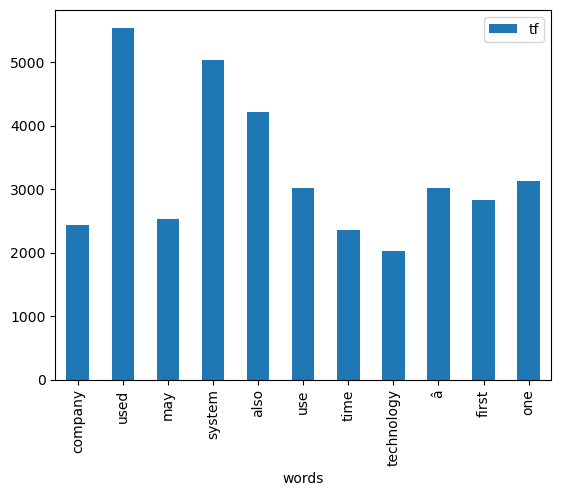

In [16]:
# 2000'den fazla geçen kelimelerin görselleştirilmesi
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

In [ ]:
# Kelimeleri wordcloud ile görselleştiririz.

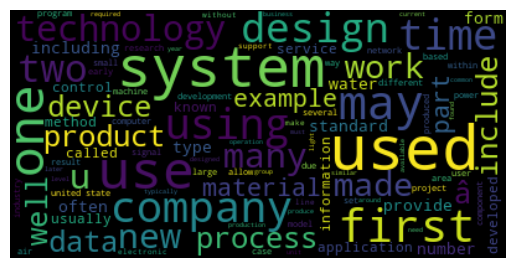

In [17]:
# kelimeleri birleştirdik
text = " ".join(i for i in df["text"])

# wordcloud görselleştirmenin özelliklerini belirliyoruz
wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()